In [1]:
# Compile and import local pyrossgeo module
import os, sys
owd = os.getcwd()
os.chdir('../../../')
sys.path.insert(0,'../../../')
!sh local_setup.sh
os.chdir(owd)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyrossgeo

import datetime
import time

running build_ext
copying build/lib.linux-x86_64-3.7/pyrossgeo/Simulation.cpython-37m-x86_64-linux-gnu.so -> pyrossgeo
copying build/lib.linux-x86_64-3.7/pyrossgeo/__defs__.cpython-37m-x86_64-linux-gnu.so -> pyrossgeo
copying build/lib.linux-x86_64-3.7/pyrossgeo/_helpers.cpython-37m-x86_64-linux-gnu.so -> pyrossgeo
copying build/lib.linux-x86_64-3.7/pyrossgeo/_initialization.cpython-37m-x86_64-linux-gnu.so -> pyrossgeo
copying build/lib.linux-x86_64-3.7/pyrossgeo/_simulation.cpython-37m-x86_64-linux-gnu.so -> pyrossgeo


Simulation parameters

In [2]:
model_path = 'model.json' 
commuter_networks_path = 'commuter_networks.csv'
node_parameters_path = 'node_parameters.csv'
cnode_parameters_path = 'cnode_parameters.csv' 
contact_matrices_path = 'contact_matrices.json' 
node_cmatrices_path = 'node_cmatrices.csv' 
cnode_cmatrices_path = 'cnode_cmatrices.csv' 
node_positions_path = 'node_positions.csv' 
node_populations_path = 'node_populations.csv' 

Simulation settings

In [3]:
t_start = 0
t_end = 24*60*800

_, dts = pyrossgeo.utils.get_dt_schedule([
    (0,  1*60),
    (5*60,  1),
    (11*60, 1*60),
    (16*60, 1),
    (22*60, 1*60)
], end_time=24*60)

Run simulation

In [4]:
sim = pyrossgeo.Simulation()

X_state = sim.initialize(model_path, commuter_networks_path,
                            node_parameters_path, cnode_parameters_path,
                            contact_matrices_path, node_cmatrices_path, cnode_cmatrices_path,
                            node_populations_path)

start_time = time.time()
dX_state = np.zeros(X_state.size)
sim_data = sim.simulate(X_state, t_start, t_end, dts, steps_per_save=10)
end_time = time.time()
sim_time = (end_time - start_time)/(60*60)
print("Simulation complete. Run-time (h): %s" % sim_time)

ts, node_data, cnode_data, location_data, community_data, network_data = pyrossgeo.utils.get_simulation_data(sim_data)

ts_days = ts / (24*60)
ts_hours = ts / 60

(0, 0, 0) [1 1]
(1, 0, 0) [1 1]
(2, 0, 0) [1 1]
(0, 0, 1) [1 1]
(1, 0, 2) [1 1]
(1, 1, 0) [1 1]
(0, 1, 1) [1 1]
(1, 1, 1) [1 1]
(2, 1, 1) [1 1]
(0, 2, 1) [1 1]
(0, 2, 2) [1 1]
(0, 0, 0) [0 0]
(1, 0, 0) [0 0]
(2, 0, 0) [0 0]
(0, 1, 1) [0 0]
(1, 1, 1) [0 0]
(2, 1, 1) [0 0]
(0, 2, 2) [0 0]
(0, 0, 0, 1) [2 2]
(1, 0, 0, 2) [2 2]
(0, 0, 1, 0) [2 2]
(1, 0, 2, 0) [2 2]
(1, 1, 0, 1) [2 2]
(1, 1, 1, 0) [2 2]
(0, 2, 1, 2) [2 2]
(0, 2, 2, 1) [2 2]
Simulation complete. Run-time (h): 0.00025647355450524224


## Plot data

Text(0.5, 0, 'Days')

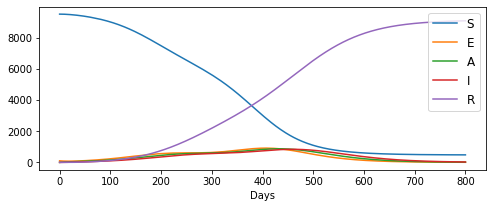

In [5]:
plt.figure( figsize=(8,3) )

S = np.sum(network_data[:,:,0], axis=1)
E = np.sum(network_data[:,:,1], axis=1)
A = np.sum(network_data[:,:,2], axis=1)
I = np.sum(network_data[:,:,3], axis=1)
R = np.sum(network_data[:,:,4], axis=1)

plt.plot(ts_days, S, label="S")
plt.plot(ts_days, E, label="E")
plt.plot(ts_days, A, label="A")
plt.plot(ts_days, I, label="I")
plt.plot(ts_days, R, label="R")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')

Text(0.5, 0, 'Days')

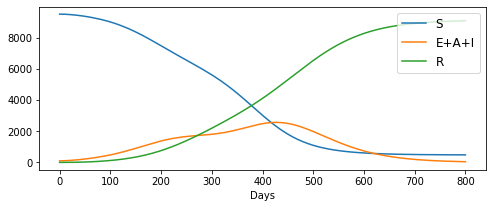

In [6]:
plt.figure( figsize=(8,3) )

S = np.sum(network_data[:,:,0], axis=1)
E = np.sum(network_data[:,:,1], axis=1)
A = np.sum(network_data[:,:,2], axis=1)
I = np.sum(network_data[:,:,3], axis=1)
R = np.sum(network_data[:,:,4], axis=1)
N = S + E + A + I + R

plt.plot(ts_days, S, label="S")
plt.plot(ts_days, E+A+I, label="E+A+I")
plt.plot(ts_days, R, label="R")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')

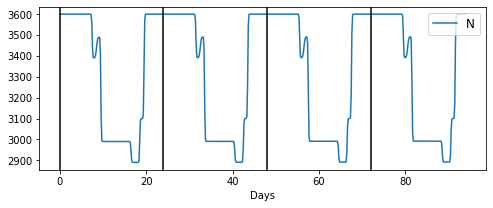

In [7]:
plt.figure( figsize=(8,3) )

loc = 0

S = np.sum(location_data[:,:,0,loc], axis=1)
E = np.sum(location_data[:,:,1,loc], axis=1)
A = np.sum(location_data[:,:,2,loc], axis=1)
I = np.sum(location_data[:,:,3,loc], axis=1)
R = np.sum(location_data[:,:,4,loc], axis=1)
N = S + E + A + I + R

s = (ts_hours < 24*4)

#plt.plot(ts_hours[s], S[s], label="S")
#plt.plot(ts_hours[s], E[s], label="E")
#plt.plot(ts_hours[s], A[s], label="A")
#plt.plot(ts_hours[s], I[s], label="I")
#plt.plot(ts_hours[s], R[s], label="R")
plt.plot(ts_hours[s], N[s], label="N")

plt.axvline(0, color='black')
plt.axvline(24, color='black')
plt.axvline(48, color='black')
plt.axvline(72, color='black')

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')
plt.show()

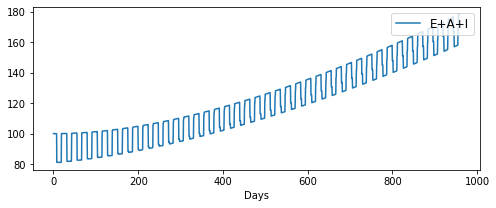

In [8]:
plt.figure( figsize=(8,3) )

loc = 0

S = np.sum(location_data[:,:,0,loc], axis=1)
E = np.sum(location_data[:,:,1,loc], axis=1)
A = np.sum(location_data[:,:,2,loc], axis=1)
I = np.sum(location_data[:,:,3,loc], axis=1)
R = np.sum(location_data[:,:,4,loc], axis=1)
N = S + E + A + I + R

s = (ts_hours < 24*40)

plt.plot(ts_hours[s], E[s]+A[s]+I[s], label="E+A+I")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')
plt.show()